### Bibliotecas
---

In [28]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib

In [29]:
data = pd.read_excel("data/concrete_data.xls")
data.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [30]:
data.columns = ['cement','slag','fly_ash','water','superplasticizer','coarse_aggr','fine_aggr','age','compressive_strength']
data.head()

cement   slag  fly_ash  water  superplasticizer  coarse_aggr  fine_aggr  \
0   540.0    0.0      0.0  162.0               2.5       1040.0      676.0   
1   540.0    0.0      0.0  162.0               2.5       1055.0      676.0   
2   332.5  142.5      0.0  228.0               0.0        932.0      594.0   
3   332.5  142.5      0.0  228.0               0.0        932.0      594.0   
4   198.6  132.4      0.0  192.0               0.0        978.4      825.5   

   age  compressive_strength  
0   28             79.986111  
1   28             61.887366  
2  270             40.269535  
3  365             41.052780  
4  360             44.296075

In [31]:
data.dtypes

cement                  float64
slag                    float64
fly_ash                 float64
water                   float64
superplasticizer        float64
coarse_aggr             float64
fine_aggr               float64
age                       int64
compressive_strength    float64
dtype: object

In [32]:
data.isna().sum()

cement                  0
slag                    0
fly_ash                 0
water                   0
superplasticizer        0
coarse_aggr             0
fine_aggr               0
age                     0
compressive_strength    0
dtype: int64

In [33]:
data.corr(method='spearman').style.background_gradient(cmap='viridis')

In [34]:
data.describe()

cement         slag      fly_ash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.165631    73.895485    54.187136   181.566359          6.203112   
std     104.507142    86.279104    63.996469    21.355567          5.973492   
min     102.000000     0.000000     0.000000   121.750000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.350000   
75%     350.000000   142.950000   118.270000   192.000000         10.160000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarse_aggr    fine_aggr          age  compressive_strength  
count  1030.000000  1030.000000  1030.000000           1030.000000  
mean    972.918592   773.578883    45.662136             35.817836  
std      77.753818    80.175427    63.169912             16.705679  
min     801.000000   594.000000     1.000000              2.331808  
25%     932.000000   730.950000     7.000000             23.707115  
50%     968.000000   779.510000    28.000000             34.442774  
75%    1029.400000   824.000000    56.000000             46.136287  
max    1145.000000   992.600000   365.000000             82.599225

### Separando em treino e teste
---

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='compressive_strength'), 
    data['compressive_strength'], 
    test_size=0.3, 
    random_state=12345
)

### Ridge regression
---

In [36]:
rr = RidgeCV(alphas=[0.01, 0.1, 1.0]).fit(X_train, y_train)

In [37]:
y_pred = rr.predict(X_test)

In [38]:
explained_variance_score(y_true=y_test,y_pred=y_pred)

0.5940413486513725

In [39]:
mean_absolute_error(y_true=y_test,y_pred=y_pred)

8.670727868156009

In [40]:
(
    ggplot(data=pd.DataFrame({'error': y_test - y_pred}), mapping=aes(x = 'error'))
    + geom_histogram(colour="#747a80")
    + theme_bw()
    + labs(y = '')
)

/home/wellington/miniconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


<ggplot: (8769471166383)>

In [41]:
joblib.dump(rr, "concrete-1.0.joblib")

['concrete-1.0.joblib']

### Random Forest
---

In [42]:
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=343),
    param_grid={"n_estimators": [25, 50, 100, 200], 'min_samples_split': [3, 5, 7, 9]},
    scoring="explained_variance",
    cv=3
)
grid_search.fit(X_train.values, y_train.values)
rf = grid_search.best_estimator_

In [43]:
y_pred = rf.predict(X_test.values)

In [44]:
explained_variance_score(y_true=y_test,y_pred=y_pred)

0.8998026066854397

In [45]:
mean_absolute_error(y_true=y_test,y_pred=y_pred)

3.6115871930039223

/home/wellington/miniconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


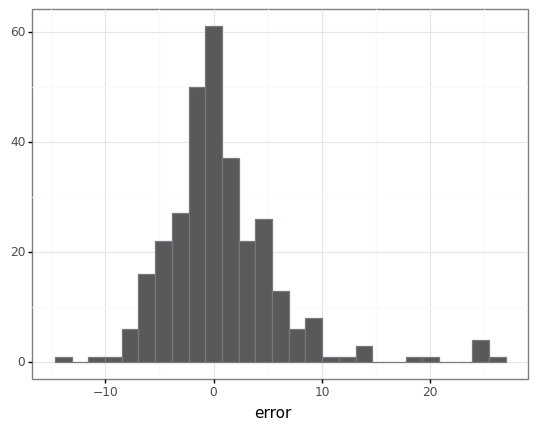

<ggplot: (8769471191784)>

In [46]:
(
    ggplot(data=pd.DataFrame({'error': y_test - y_pred}), mapping=aes(x = 'error'))
    + geom_histogram(colour="#747a80")
    + theme_bw()
    + labs(y = '')
)

In [47]:
joblib.dump(rf, "concrete-2.0.joblib")

['concrete-2.0.joblib']